# **Gait Cycle Detection**

> In this project, the **CASIS B dataset** has been selected. Each object is then measured by height and width through a bounding box to calculate the aspect ratio. In Figure we noticed that the **bounding box** is wide when the 
legs are away from each other and narrow when the bounding box is close to the feet. This concept helps to identify the gait cycle by calculating the **aspect ratio**. Finally, we find the gait cycle represents **three local minima** in the aspect ratio curve.

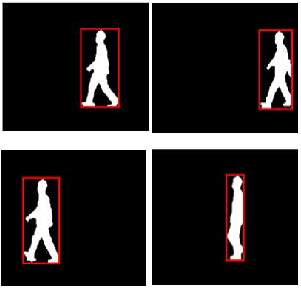


In [ ]:
import os
import cv2
import numpy as np
from skimage.io import imread
from google.colab import drive
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

cv2.startWindowThread()
drive.mount('/gdrive', force_remount=True)


ID = []
start = []
end = []
mn = []
def findLocalMinima(n, arr):
  if arr[0] < arr[1]:
    mn.append(0)

  for i in range(1, n-1):              
    if arr[i-1] >= arr[i] < arr[i + 1]:  
      mn.append(i)
  
  if arr[n-1] < arr[n-2]:
    mn.append(n-1)


Covariate = ['bg-01','bg-02','cl-01','cl-02','nm-01','nm-02','nm-03','nm-04','nm-05','nm-06']
for ii in range(1,125):
   for jj in range(10):
     for kk in range(4,7):
       subject = "%03d" % ii
       covariate = Covariate[jj]
       angle = "%03d" % (kk*18)

       path = "/gdrive/My Drive/......../%s/%s/%s/" %(subject, covariate, angle)                #update your path
       dirs = os.listdir(path)
       dirs.sort(reverse=False)
       x_axis = []
       y_axis = []
       counter = 0

       for i in dirs:
         image = cv2.imread(path+i)
         copy = image.copy()
         gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
         thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
         
         cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
         cnts = cnts[0] if len(cnts) == 2 else cnts[1]
         counter = counter + 1
         
         ROI_number = 0
         for c in cnts:
           x,y,w,h = cv2.boundingRect(c)
           ROI = image[y:y+h, x:x+w]
           cv2.imwrite('%s' %i, ROI)
           cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
           ROI_number += 1
           aspect_ratio = h / w

           x_axis.append(counter)
           y_axis.append(aspect_ratio)


         
         flag = False
         nx_axis = []
         ny_axis = []
         x_axisIdx = 0
         y_axis = list(dict.fromkeys(y_axis))
         axis_len = abs(len(y_axis)-len(x_axis))
         for axis_i in range(axis_len):
           x_axis.pop()

         for xi in range(len(x_axis)-1):
           if(x_axis[xi]==x_axis[xi+1]):
             if flag == False:
               x_axisIdx += 1
               nx_axis.append(x_axisIdx)
               ny_axis.append(y_axis[xi])
               flag = True
               
           else:
             x_axisIdx += 1
             nx_axis.append(x_axisIdx)
             ny_axis.append(y_axis[xi+1])

    
     #  You can show bounding box in each image
        #  cv2_imshow(copy)
        #  cv2.waitKey()

    # You can show aspect ratio curve in each dirs 
      #  plt.plot(nx_axis, ny_axis)
      #  plt.xlabel('Frame Number')
      #  plt.ylabel('Aspect Ratio')
      #  plt.show()

       mn.clear()                              # Clear mn list values
       findLocalMinima(nx_axis[-1], ny_axis)

    # start frame is mn[0] and ending frame is mn[2]
       if len(mn) < 2:
         break
       else:
         start_frame = mn[0]        
         end_frame = mn[2]          
         frame_number = mn[2]-mn[0] 
         frame_counter = 0  

       if(len(nx_axis) < 25):
         break


       while 1:
        frame_counter = frame_counter + 1  
        if  len(mn) < frame_counter:
          break

        if len(mn) < (2+frame_counter):
          break

        if frame_number < 20:  
          end_frame = mn[2+frame_counter]        
          frame_number = end_frame - start_frame 
  
        if frame_number > 19:
          break

       if(frame_number > 30):
         end_frame = start_frame + 25
         frame_number = end_frame - start_frame
       
       ID.append("%s_%s_%s" %(subject, covariate, angle))
       start.append(start_frame)
       end.append(end_frame)
       print("%s-%s-%s --> start Frame: %d End Frame: %d Number of Frame: %d" %(subject, covariate,angle, start_frame, end_frame,frame_number))

    # You can show complete gait cycle frame 
      #  dirs = dirs[start_frame: end_frame]
      #  lists = np.ndarray((frame_number,240,320))
      #  for ii, image in enumerate(dirs):
      #    lists[ii, :, :] = imread(os.path.join(path, image))
      #  lists = 1/frame_number*np.sum(lists, axis=0)
      #  plt.imshow(lists)


# You can save csv file 
#---------------------------------------------#

# import pandas as pd
# files = {'ID':ID, 'start':start, 'end':end}
# df = pd.DataFrame(files)
# df.to_csv(r'/gdrive/My Drive/......../gait_cycle.csv', index=False)    # Update your path


print("process has been successfully completed.....")